In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [116]:
datei = "C:\\Users\\KaiTs\\Documents\\Data Science\\Datasets\\autoscout24.csv"
df = pd.read_csv(datei)

In [117]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [118]:
df.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [120]:
df.describe().round(2)

,mileage,price,hp,year
count,46405.00,46405.00,46376.00,46405.00
mean,71177.86,16572.34,132.99,2016.01
std,62625.31,19304.70,75.45,3.16
min,0.00,1100.00,1.00,2011.00
25%,19800.00,7490.00,86.00,2013.00
50%,60000.00,10999.00,116.00,2016.00
75%,105000.00,19490.00,150.00,2019.00
max,1111111.00,1199900.00,850.00,2021.00


In [121]:
highest_prices = df.nlargest(5, 'price')
print(highest_prices)

       mileage           make    model      fuel       gear offerType  \
21675      431        Ferrari      F12  Gasoline  Automatic      Used   
11753       90        Maybach  Pullman  Gasoline  Automatic      Used   
11754       90  Mercedes-Benz    S 650  Gasoline  Automatic      Used   
16429     3400        Maybach  Pullman  Gasoline  Automatic      Used   
29257      350  Mercedes-Benz      SLS  Gasoline  Automatic      Used   

         price     hp  year  
21675  1199900  775.0  2017  
11753   717078  630.0  2019  
11754   717078  630.0  2019  
16429   499800  530.0  2018  
29257   465000  591.0  2015  


In [122]:

index_highest_price = df['price'].idxmax()

# Entferne den Eintrag mit dem höchsten Preis aus dem DataFrame
df = df.drop(index_highest_price)

In [123]:
highest_prices = df.nlargest(5, 'price')
print(highest_prices)

       mileage           make      model      fuel       gear offerType  \
11753       90        Maybach    Pullman  Gasoline  Automatic      Used   
11754       90  Mercedes-Benz      S 650  Gasoline  Automatic      Used   
16429     3400        Maybach    Pullman  Gasoline  Automatic      Used   
29257      350  Mercedes-Benz        SLS  Gasoline  Automatic      Used   
7384      3600    Lamborghini  Aventador  Gasoline  Automatic      Used   

        price     hp  year  
11753  717078  630.0  2019  
11754  717078  630.0  2019  
16429  499800  530.0  2018  
29257  465000  591.0  2015  
7384   449900  770.0  2021  


In [124]:
df.shape


(46404, 9)

In [125]:
df.isnull().sum()


mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

C:\Users\KaiTs\AppData\Local\Temp\ipykernel_14500\3658891777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

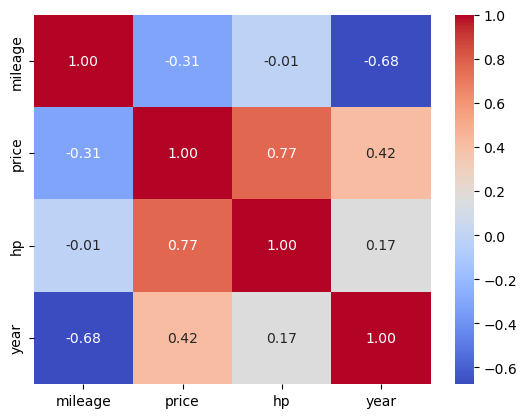

In [126]:
###Hier plotten wir eine Heatmap um die Correlationen zu erkennen
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


(2000.0, 200000.0)

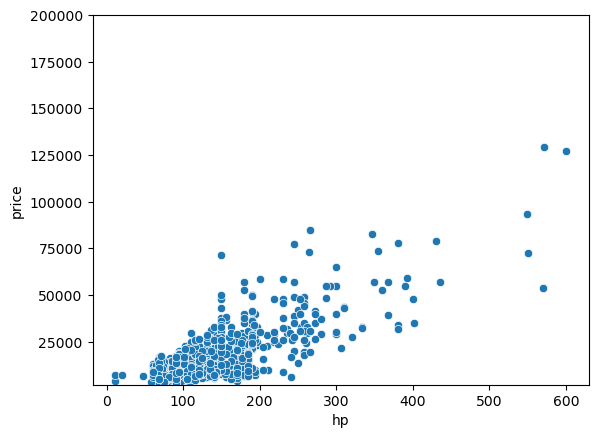

In [127]:
df_sample = df.sample(n=1000)
sns.scatterplot(data=df_sample, x='hp', y='price')
plt.ylim(2000, 200000)

##Analyse


In [128]:
unique_brands_count = df['make'].nunique()

print("Anzahl der verschiedenen Marken im Datensatz:", unique_brands_count)


Anzahl der verschiedenen Marken im Datensatz: 77


In [129]:
unique_brands = df['make'].unique()
print('Die Marken sind:', unique_brands)

Die Marken sind: ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Lada' 'Mitsubishi'
 'Others' 'Lexus' 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru'
 'Dodge' 'Microcar' 'Lamborghini' 'Baic' 'Tesla' 'Chrysler' '9ff'
 'McLaren' 'Aston' 'Rolls-Royce' 'Alpine' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Ferrari' 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou'
 'Morgan' 'Maybach' 'Tazzari' 'Trucks-Lkw' 'RAM' 'Iveco' 'DAF' 'Alpina'
 'Polestar' 'Brilliance' 'FISKER' 'Cadillac' 'Trailer-Anhänger' 'Isuzu'
 'Corvette' 'DFSK' 'Estrima']


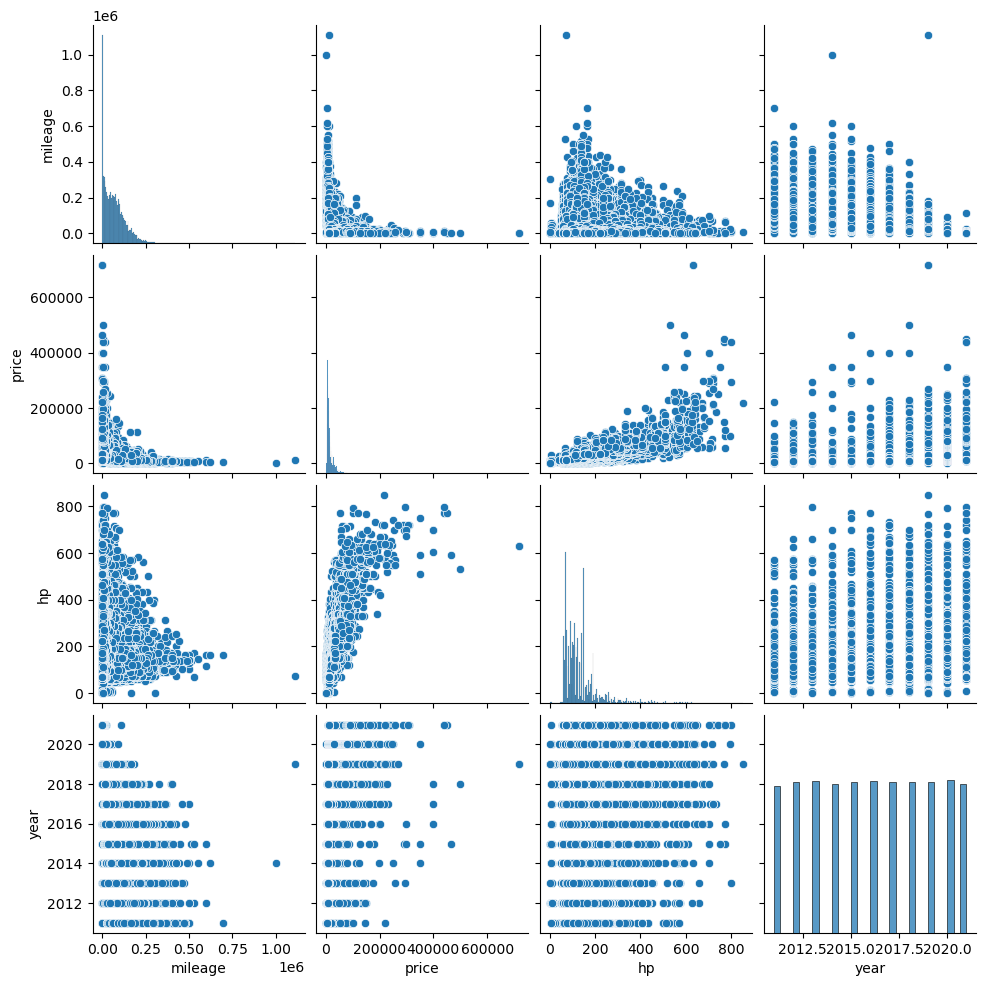

In [130]:
sns.pairplot(df)


In [131]:
bmw = df[df['make'] == 'BMW']
av_price = bmw['price'].mean().round(2)
print("Der durschnittliche Preis z. B. eines BMW´s beträgt:", av_price)

Der durschnittliche Preis z. B. eines BMW´s beträgt: 23423.67


In [132]:
brand_counts = df['make'].value_counts()
brand_counts

Volkswagen    6931
Opel          4814
Ford          4442
Skoda         2889
Renault       2830
              ... 
DAF              1
Isuzu            1
Trucks-Lkw       1
Tazzari          1
Zhidou           1
Name: make, Length: 77, dtype: int64

In [133]:
top_five_brands = brand_counts.head(5).index.tolist()
df_five = df[df['make'].isin(top_five_brands)]
print(df_five.head())
df_five.dropna(inplace=True)

   mileage        make    model      fuel    gear offerType  price     hp  \
1    92800  Volkswagen     Golf  Gasoline  Manual      Used   6877  122.0   
3    96200     Renault   Megane  Gasoline  Manual      Used   6950  110.0   
6    91894     Renault   Scenic    Diesel  Manual      Used   6970  131.0   
7   127500        Opel   Zafira  Gasoline  Manual      Used   6972  116.0   
9      104        Ford  Transit    Diesel  Manual      Used   6990   86.0   

   year  
1  2011  
3  2011  
6  2011  
7  2011  
9  2011  


C:\Users\KaiTs\AppData\Local\Temp\ipykernel_14500\4070293285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_five.dropna(inplace=True)


Mean Squared Error: 21398219.20328079
Predicted Price for Example Car: 27394.78780946741


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


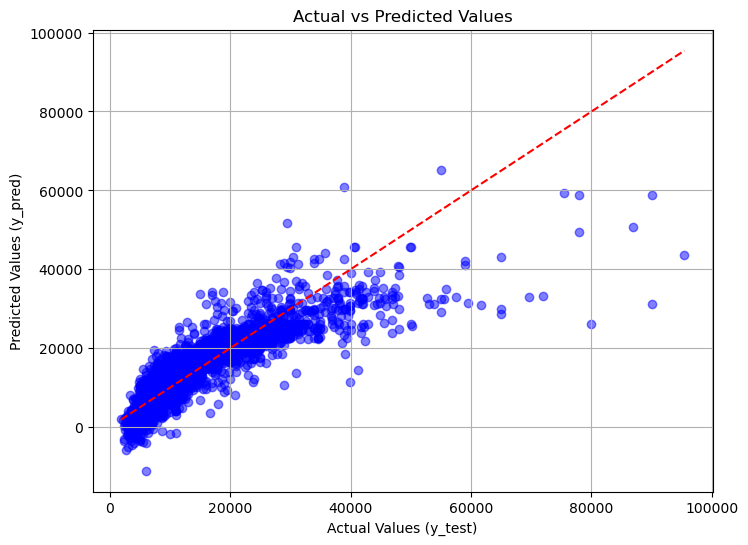

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_five[['mileage', 'hp', 'year']]
y = df_five['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

y_pred_l_reg = l_reg.predict(X_test)


mse_l_reg = mean_squared_error(y_test, y_pred_l_reg)
print("Mean Squared Error:", mse_l_reg)



example_car_features = [[50000, 200, 2018]] 
predicted_price_l_reg = l_reg.predict(example_car_features)
print("Predicted Price for Example Car:", predicted_price_l_reg[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_l_reg, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

Mean Squared Error (Polynomial Regression): 15268598.446152482
Predicted Price for Example Car (Polynomial Regression): 27485.353974878788


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


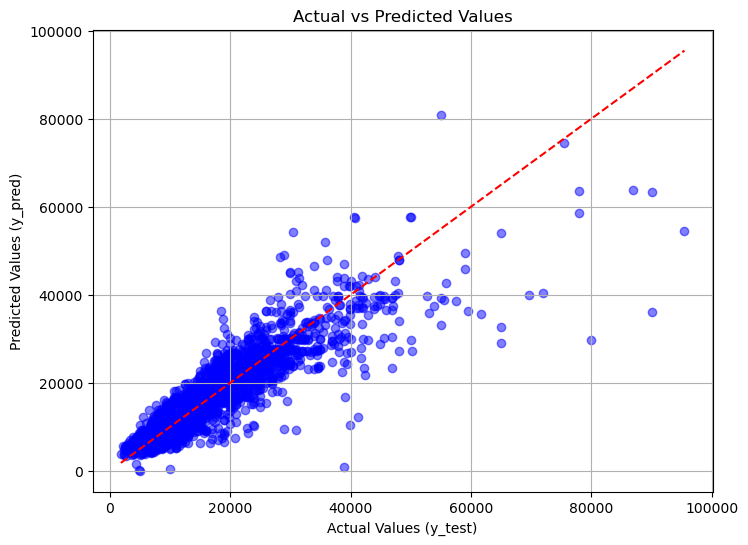

In [135]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PolynomialFeatures hinzufügen
degree = 2  # Grad des Polynoms
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Polynomiale Regression initialisieren und an Trainingsdaten anpassen
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Vorhersagen für Testdaten machen
y_pred_poly = poly_model.predict(X_test_poly)

# Leistungsmaß berechnen (zum Beispiel die mittlere quadratische Abweichung)
mse_poly_model = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly_model)

# Beispielvorhersage für ein einzelnes Auto
example_car_features = [[50000, 200, 2018]]  # Beispielwerte für Laufleistung, PS und Baujahr
example_car_features_poly = poly_features.transform(example_car_features)
predicted_price_poly = poly_model.predict(example_car_features_poly)
print("Predicted Price for Example Car (Polynomial Regression):", predicted_price_poly[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


Mean Squared Error (Random Forest Regression): 12633933.357605727
Predicted Price for Example Car (Random Forest Regression): 19601.6


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


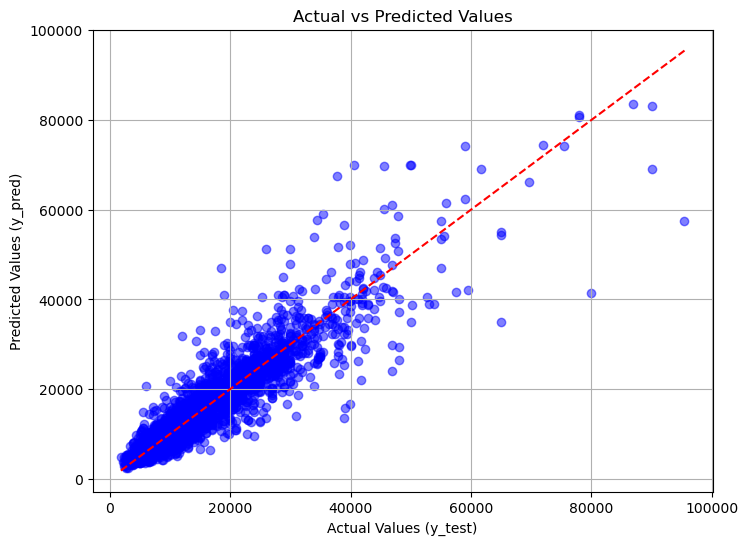

In [136]:
from sklearn.ensemble import RandomForestRegressor


# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor initialisieren und an Trainingsdaten anpassen
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Anzahl der Bäume = 100
rf.fit(X_train, y_train)

# Vorhersagen für Testdaten machen
y_pred_rf = rf.predict(X_test)

# Leistungsmaß berechnen (zum Beispiel die mittlere quadratische Abweichung)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)

# Beispielvorhersage für ein einzelnes Auto
example_car_features = [[50000, 200, 2018]]  # Beispielwerte für Laufleistung, PS und Baujahr
predicted_price_rf = rf.predict(example_car_features)
print("Predicted Price for Example Car (Random Forest Regression):", predicted_price_rf[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()



In [137]:
print("Mean Squared Error:", mse_l_reg)
print("Predicted Price for Example Car:", predicted_price_l_reg[0])

print("Mean Squared Error (Polynomial Regression):", mse_poly_model)
print("Predicted Price for Example Car (Polynomial Regression):", predicted_price_poly[0])

print("Mean Squared Error (Random Forest Regression):", mse_rf)
print("Predicted Price for Example Car (Random Forest Regression):", predicted_price_rf[0])

Mean Squared Error: 21398219.20328079
Predicted Price for Example Car: 27394.78780946741
Mean Squared Error (Polynomial Regression): 15268598.446152482
Predicted Price for Example Car (Polynomial Regression): 27485.353974878788
Mean Squared Error (Random Forest Regression): 12633933.357605727
Predicted Price for Example Car (Random Forest Regression): 19601.6


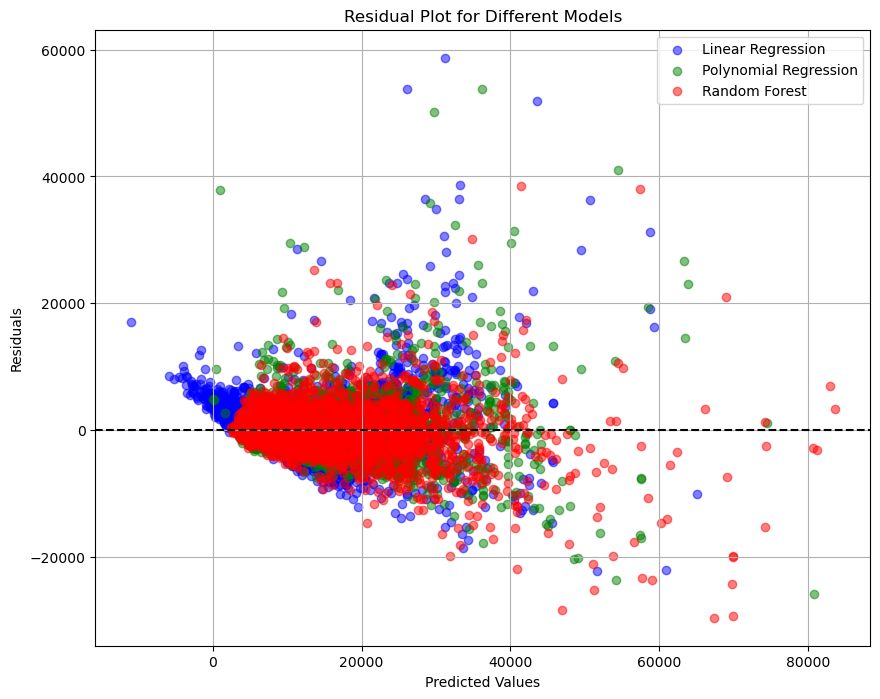

In [138]:

# Residuen berechnen
residuals_l_reg = y_test - y_pred_l_reg
residuals_poly = y_test - y_pred_poly
residuals_rf = y_test - y_pred_rf

# Residualplot erstellen
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_l_reg, residuals_l_reg, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_pred_poly, residuals_poly, color='green', alpha=0.5, label='Polynomial Regression')
plt.scatter(y_pred_rf, residuals_rf, color='red', alpha=0.5, label='Random Forest')
plt.axhline(y=0, color='black', linestyle='--')  # Nulllinie für Null-Residuen
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Different Models')
plt.legend()
plt.grid(True)
plt.show()



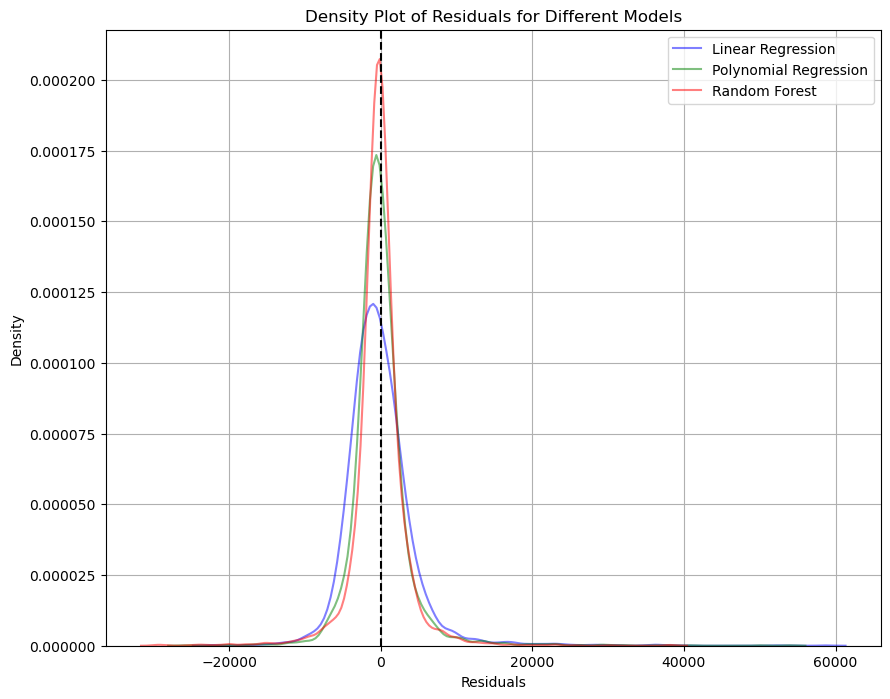

In [139]:
# Residualplot erstellen
plt.figure(figsize=(10, 8))
sns.kdeplot(residuals_l_reg, color='blue', label='Linear Regression', alpha=0.5)
sns.kdeplot(residuals_poly, color='green', label='Polynomial Regression', alpha=0.5)
sns.kdeplot(residuals_rf, color='red', label='Random Forest', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='--')  # Nulllinie für Null-Residuen
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [140]:
from sklearn.preprocessing import LabelEncoder

# Annahme: df ist der DataFrame mit den Autodaten

# Kopie des DataFrame erstellen, um Änderungen vorzunehmen
df_encoded = df.copy()

# Label-Encoding für jede kategorische Spalte durchführen
categorical_columns = ['gear', 'fuel', 'offerType']
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df[column])

# Zuordnung von String zu numerischem Wert für jede kategorische Spalte ausgeben
for column in categorical_columns:
    print("Zuordnung von String zu numerischem Wert für die Spalte '{}':".format(column))
    for string_value, numeric_value in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)):
        print("{}: {}".format(string_value, numeric_value))
    print()



Zuordnung von String zu numerischem Wert für die Spalte 'gear':
Automatic: 0
Manual: 1
Semi-automatic: 2
nan: 3

Zuordnung von String zu numerischem Wert für die Spalte 'fuel':
-/- (Fuel): 0
CNG: 1
Diesel: 2
Electric: 3
Electric/Diesel: 4
Electric/Gasoline: 5
Ethanol: 6
Gasoline: 7
Hydrogen: 8
LPG: 9
Others: 10

Zuordnung von String zu numerischem Wert für die Spalte 'offerType':
Demonstration: 0
Employee's car: 1
New: 2
Pre-registered: 3
Used: 4



C:\Users\KaiTs\AppData\Local\Temp\ipykernel_14500\467532605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_encoded.corr()


<Axes: >

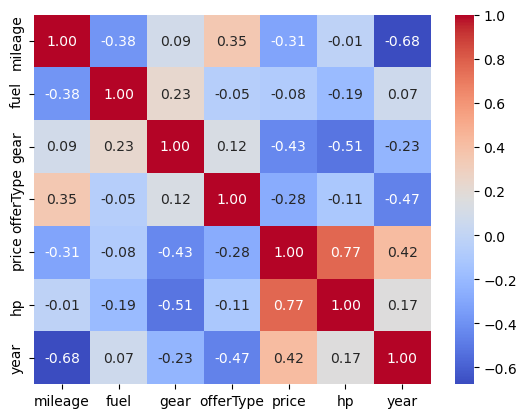

In [141]:
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [142]:
brand_counts = df_encoded['make'].value_counts()
brand_counts

top_five_brands = brand_counts.head(5).index.tolist()
df_encoded_five = df_encoded[df_encoded['make'].isin(top_five_brands)]
df_encoded_five.dropna(inplace=True)



C:\Users\KaiTs\AppData\Local\Temp\ipykernel_14500\1714869843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_five.dropna(inplace=True)


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error: 18883546.430800408
Predicted Price for Example Car: 24243.213430204894


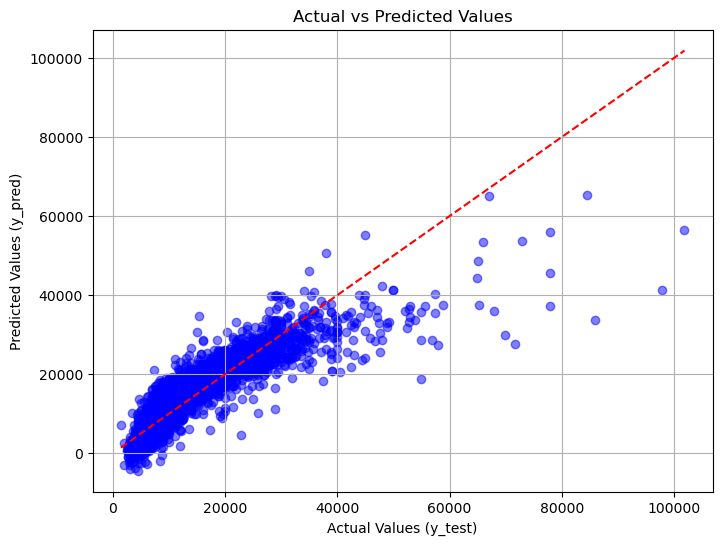

In [143]:
X = df_encoded_five[['mileage', 'hp', 'year', 'fuel', 'offerType', 'gear']]
y = df_encoded_five['price']

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineare Regression initialisieren und an Trainingsdaten anpassen
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen für Testdaten machen
y_pred = model.predict(X_test)

# Leistungsmaß berechnen (zum Beispiel die mittlere quadratische Abweichung)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Beispielvorhersage für ein einzelnes Auto
example_car_features = [[50000, 200, 2018, 2, 0, 4]]  # Beispielwerte für Laufleistung, PS und Baujahr
predicted_price = model.predict(example_car_features)
print("Predicted Price for Example Car:", predicted_price[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


Mean Squared Error (Random Forest Regression): 10272599.880807905
Predicted Price for Example Car (Random Forest Regression): 27503.11


c:\Users\KaiTs\anaconda3neu\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


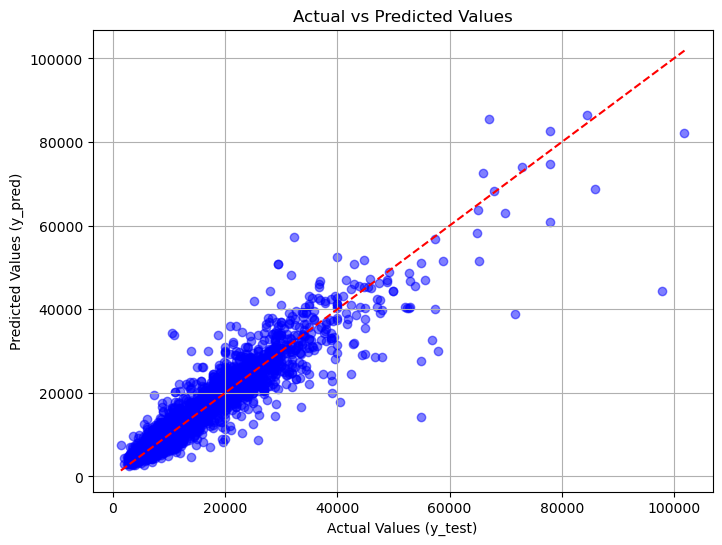

In [144]:


# Random Forest Regressor initialisieren und an Trainingsdaten anpassen
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Anzahl der Bäume = 100
rf.fit(X_train, y_train)

# Vorhersagen für Testdaten machen
y_pred_rf = rf.predict(X_test)

# Leistungsmaß berechnen (zum Beispiel die mittlere quadratische Abweichung)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)

# Beispielvorhersage für ein einzelnes Auto
example_car_features = [[50000, 200, 2018, 2, 0, 4]]  # Beispielwerte für Laufleistung, PS und Baujahr
predicted_price_rf = rf.predict(example_car_features)
print("Predicted Price for Example Car (Random Forest Regression):", predicted_price_rf[0])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)  # Plot von y_test gegen y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonale (perfekte Vorhersage)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()
